# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Copyright statement: 
#### <span style='font-family:"Times New Roman"'>The Spikes dataset was provided by Dr. Sandoval (Assitant professor of Electrical Engineering, New Mexico State University). https://web.nmsu.edu/~spsandov/ 
#### <span style='font-family:"Times New Roman"'>The algorithm in current form is developed by Sina Zamen. 

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>Principal component analysis for classification of spikes data is considered. First, three main components of spikes data are considered. Then, using K-means algorithm and selected components, classification in time domain has been performed.  

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
from mpl_toolkits.mplot3d import axes3d,Axes3D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.special import gammainc
import matplotlib.pyplot as plt
from numpy.linalg import norm
from matplotlib import style
from numpy import genfromtxt
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib
import random
import copy
import math
import os
style.use('ggplot')

### <span style='font-family:"Times New Roman"'>Defining Functions:

In [2]:
def k_means(data, num_clus=3, steps=200):

    # Convert data to Numpy array
    cluster_data = np.array(data)
    
    # Initialize by randomly selecting points in the data
    center_init = np.random.randint(0, cluster_data.shape[0], num_clus)

    # Create a list with center coordinates
    center_init = cluster_data[center_init, :]

    # Repeat clustering  x times
    for _ in range(steps):

        # Calculate distance of each data point to cluster center
        distance = []
        for center in center_init:
            tmp_distance = np.sqrt(np.sum((cluster_data - center)**2, axis=1))
            
            # Adding smalle random noise to the data to avoid matching distances to centroids
            tmp_distance = tmp_distance + np.abs(np.random.randn(len(tmp_distance))*0.0001)
            distance.append(tmp_distance)

        # Assign each point to cluster based on minimum distance
        _, cluster = np.where(np.transpose(distance == np.min(distance, axis=0)))

        # Find center of mass for each cluster
        center_init = []
        for i in range(num_clus):    
            center_init.append(cluster_data[cluster == i, :].mean(axis=0).tolist())
            
    return cluster, center_init, distance

In [3]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [4]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

### <span style='font-family:"Times New Roman"'>Loading and Displaying Spikes data:

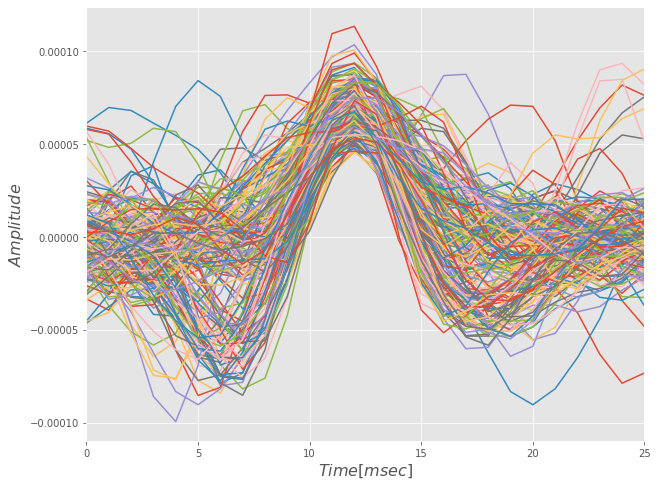

In [5]:
data = genfromtxt(fname = "spikes.csv", delimiter=',')
X = data.T
plt.figure(figsize=(10,8))
plt.plot(X)
plt.xlim(0,25)
plt.xlabel('$Time [msec]$', fontsize=16)
plt.ylabel('$Amplitude$', fontsize=16)
plt.show()

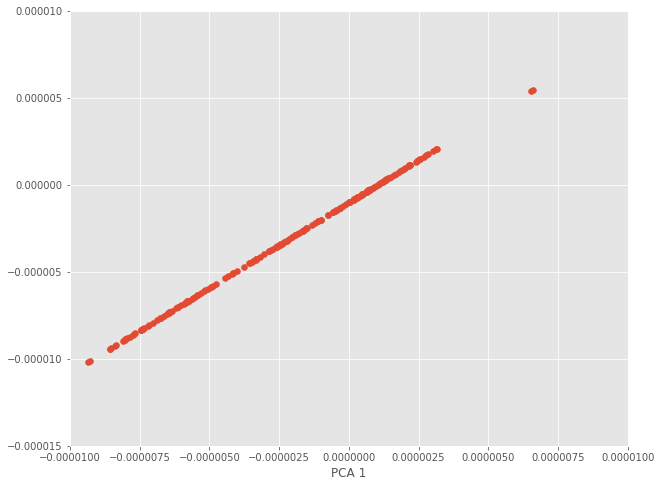

In [6]:
pca = PCA(1) # project from 200 to 1 dimensions
projected = pca.fit_transform(X.T)
X_new = pca.inverse_transform(projected)
plt.figure(figsize=(10,8))
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlabel('PCA 1')
plt.xlim(-0.00001, 0.00001)
plt.ylim(-0.000015, 0.00001)
plt.show()

In [7]:
pca = PCA(2) # project from 26 to 2 dimensions
projected = pca.fit_transform(X.T)

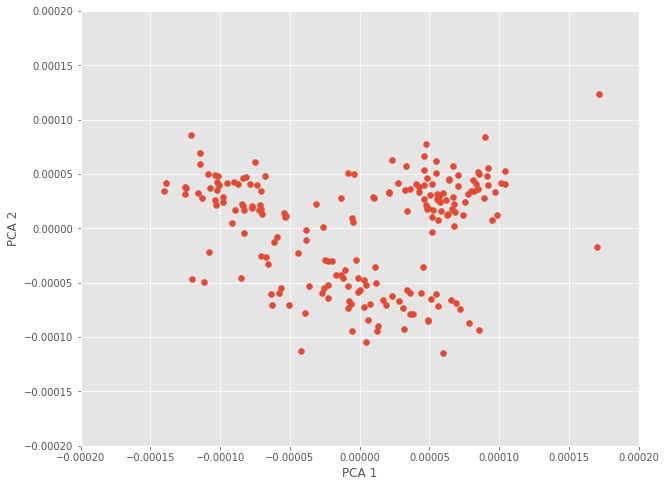

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.xlim(-0.0002, 0.0002)
plt.ylim(-0.0002, 0.0002)
plt.show()

In [9]:
pca = PCA(3) # project from 26 to 3 dimensions
projected = pca.fit_transform(X.T)

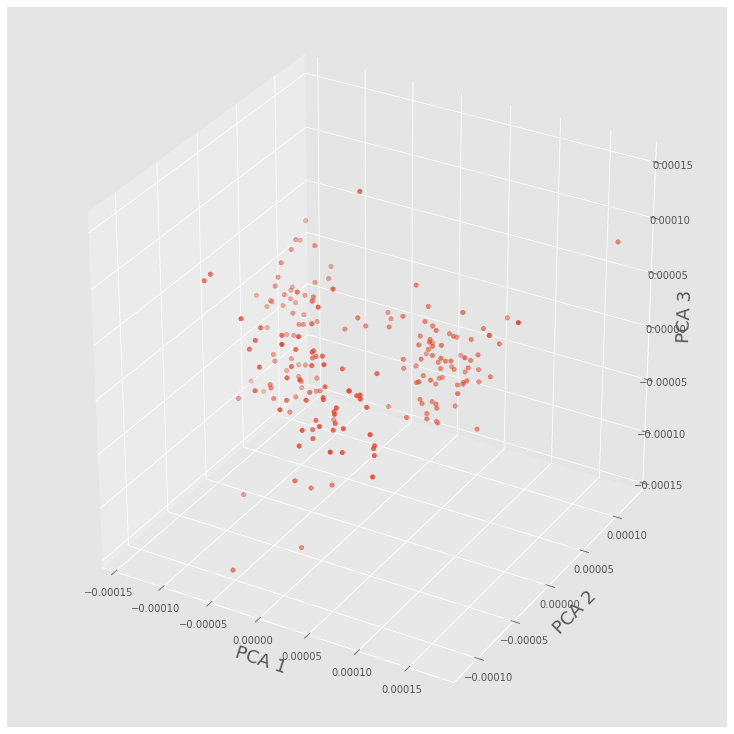

In [10]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.scatter3D(projected[:, 0],projected[:, 1],projected[:, 2])
ax.set_xlabel('PCA 1',linespacing=4,fontsize=18)
ax.set_ylabel('PCA 2',linespacing=4,fontsize=18)
ax.set_zlabel('PCA 3',linespacing=4,fontsize=18)
plt.show()

In [11]:
max_num_clusters = 6

average_distance = []
for run in range(20):
    tmp_average_distance = []
    for num_clus in range(1, max_num_clusters +1):
        cluster, centers, distance = k_means(projected, num_clus)
        tmp_average_distance.append(np.mean([np.mean(distance[x][cluster==x]) for x in range(num_clus)], axis=0))
    average_distance.append(tmp_average_distance)

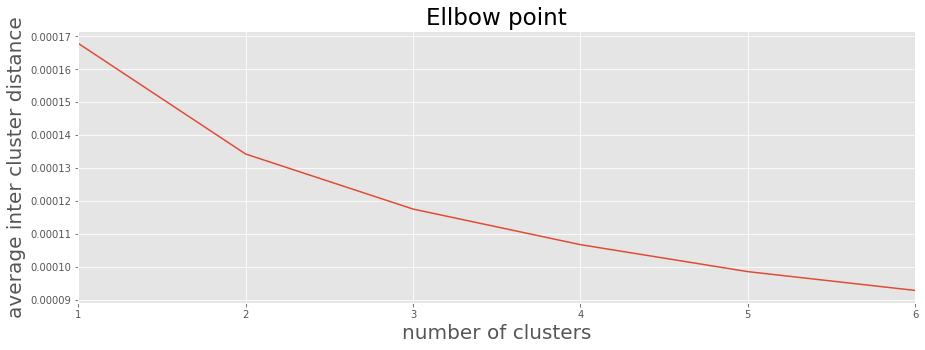

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(range(1, max_num_clusters +1), np.mean(average_distance, axis=0))
ax.set_xlim([1, max_num_clusters])
ax.set_xlabel('number of clusters', fontsize=20)
ax.set_ylabel('average inter cluster distance', fontsize=20)
ax.set_title('Ellbow point', fontsize=23)
plt.show()

In [13]:
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [random.uniform(-0.0002,0.0002), random.uniform(-0.0002,0.0002)]
    for i in range(k)
}

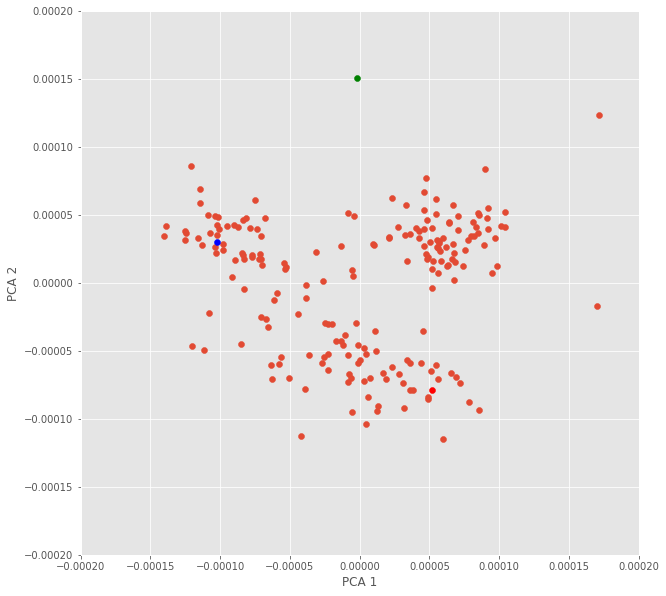

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(projected[:, 0], projected[:, 1])
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.xlim(-0.0002, 0.0002)
plt.ylim(-0.0002, 0.0002)
plt.show()

In [15]:
df = pd.DataFrame({
    'x': projected[:, 0],
    'y': projected[:, 1]
    })

In [16]:
df = assignment(df, centroids)
print(df.head())

          x         y  distance_from_1  distance_from_2  distance_from_3  \
0 -0.000005  0.000005         0.000102         0.000145         0.000101   
1 -0.000083 -0.000004         0.000154         0.000175         0.000040   
2  0.000067  0.000029         0.000109         0.000140         0.000169   
3  0.000049 -0.000085         0.000007         0.000241         0.000190   
4 -0.000009 -0.000073         0.000061         0.000224         0.000140   

   closest color  
0        3     b  
1        3     b  
2        1     r  
3        1     r  
4        1     r  


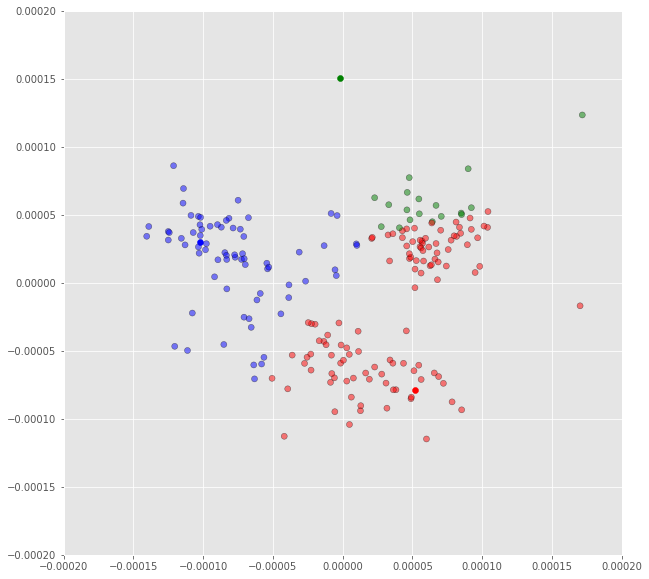

In [17]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-0.0002, 0.0002)
plt.ylim(-0.0002, 0.0002)
plt.show()

In [18]:
old_centroids = copy.deepcopy(centroids)
centroids = update(centroids)

In [19]:
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])

In [20]:
df = assignment(df, centroids)

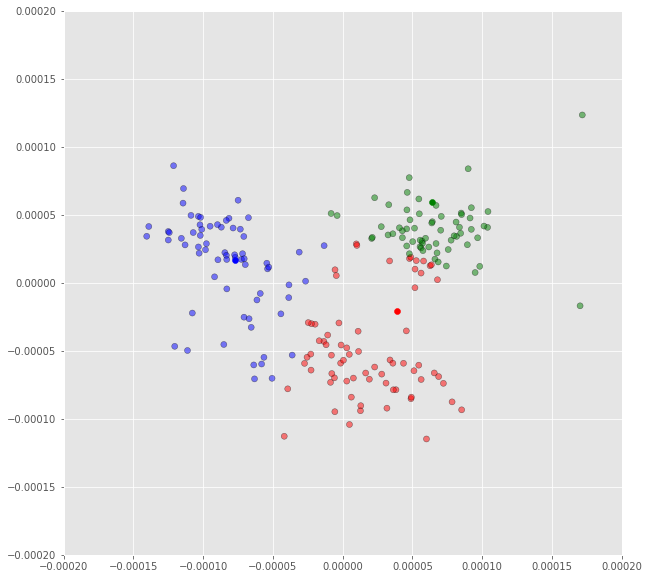

In [21]:
# Plot results
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-0.0002, 0.0002)
plt.ylim(-0.0002, 0.0002)
plt.show()

In [22]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

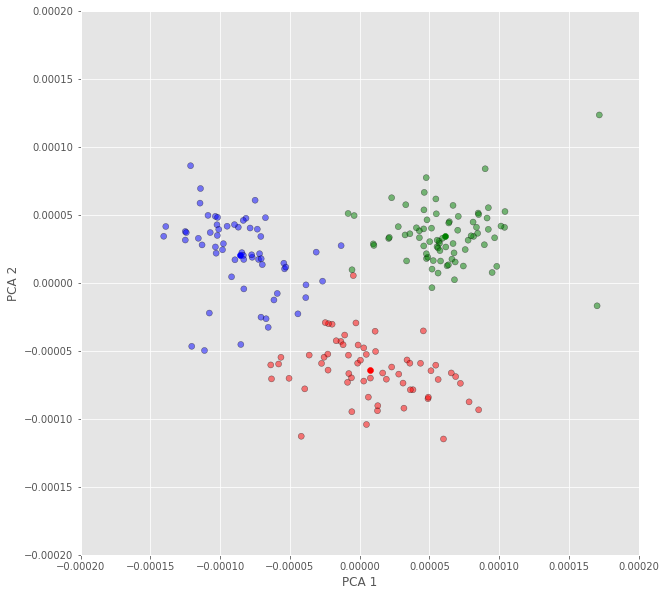

In [23]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.xlim(-0.0002, 0.0002)
plt.ylim(-0.0002, 0.0002)
plt.show()

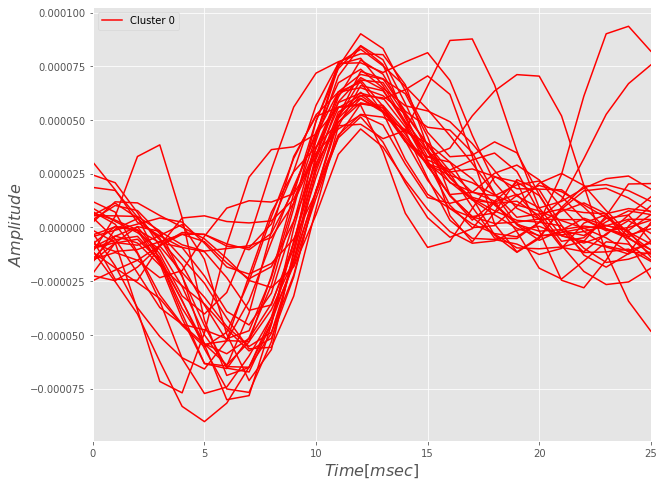

In [24]:
plt.figure(figsize=(10,8))
cluster_mean = X[:,cluster==0]
plt.plot(cluster_mean, 'red')
plt.legend(['Cluster 0'])
plt.xlim(0,25)
plt.xlabel('$Time [msec]$', fontsize=16)
plt.ylabel('$Amplitude$', fontsize=16)
plt.show()

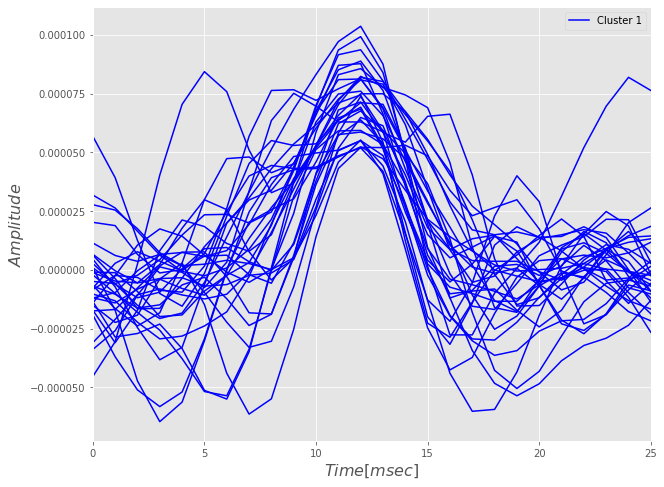

In [25]:
plt.figure(figsize=(10,8))
cluster_mean = X[:,cluster==1]
plt.plot(cluster_mean, 'b')
plt.legend(['Cluster 1'])
plt.xlim(0,25)
plt.xlabel('$Time [msec]$', fontsize=16)
plt.ylabel('$Amplitude$', fontsize=16)
plt.show()

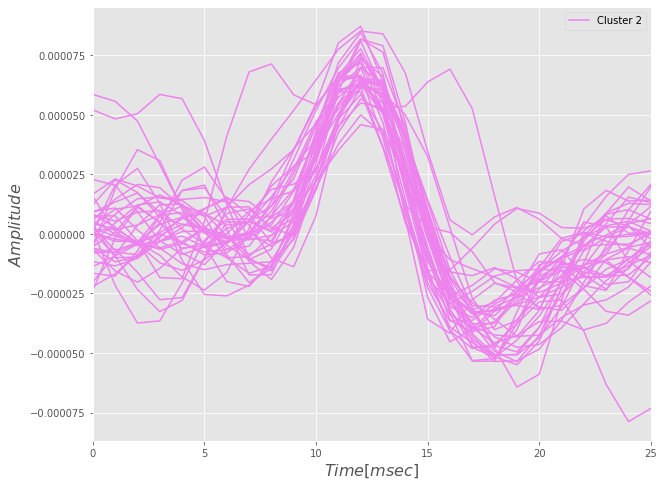

In [26]:
plt.figure(figsize=(10,8))
cluster_mean = X[:,cluster==2]
plt.plot(cluster_mean, 'violet')
plt.legend(['Cluster 2'])
plt.xlim(0,25)
plt.xlabel('$Time [msec]$', fontsize=16)
plt.ylabel('$Amplitude$', fontsize=16)
plt.show()